# Neural Audio Synthesis with NSynth


## Part 1: Encoding and Decoding

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
from IPython.display import Audio
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


Now we'll load up a .wav audio file.  The `utils.load_audio` method will resample this to the required sample rate of 16000.  Here I load in a simple 4 second tone that when played on an oscilloscope displays a simple square.

In [2]:
# from https://www.freesound.org/people/MustardPlug/sounds/395058/
fname = 'simplecube.wav'
sr = 16000
audio = utils.load_audio(fname, sample_length=64000, sr=sr)
sample_length = audio.shape[0]
print('{} samples, {} seconds'.format(sample_length, sample_length / float(sr)))

64000 samples, 4.0 seconds


## Encoding

```help(fastgen.encode)
Help on function encode in module magenta.models.nsynth.wavenet.fastgen:

encode(wav_data, checkpoint_path, sample_length=64000)
    Generate an array of embeddings from an array of audio.
      Args:
        wav_data: Numpy array [batch_size, sample_length]
        checkpoint_path: Location of the pretrained model.
        sample_length: The total length of the final wave file, padded with 0s.
      Returns:
        encoding: a [mb, 125, 16] encoding (for 64000 sample audio file).
```

In [2]:
!wget http://download.magenta.tensorflow.org/models/nsynth/wavenet-ckpt.tar
!tar -xvf wavenet-ckpt.tar

--2019-05-16 22:00:38--  http://download.magenta.tensorflow.org/models/nsynth/wavenet-ckpt.tar
Resolving web.ucsd.edu (web.ucsd.edu)... 132.239.1.231, 132.239.1.230
Connecting to web.ucsd.edu (web.ucsd.edu)|132.239.1.231|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 993896960 (948M) [application/x-tar]
Saving to: ‘wavenet-ckpt.tar.1’

wavenet-ckpt.tar.1  100%[===================>] 947.85M  44.0MB/s    in 20s     

2019-05-16 22:00:58 (48.0 MB/s) - ‘wavenet-ckpt.tar.1’ saved [993896960/993896960]

./._wavenet-ckpt
wavenet-ckpt/
wavenet-ckpt/checkpoint
wavenet-ckpt/._model.ckpt-200000.data-00000-of-00001
wavenet-ckpt/model.ckpt-200000.data-00000-of-00001
wavenet-ckpt/._model.ckpt-200000.index
wavenet-ckpt/model.ckpt-200000.index
wavenet-ckpt/._model.ckpt-200000.meta
wavenet-ckpt/model.ckpt-200000.meta


In [8]:
%time encoding = fastgen.encode(audio, 'wavenet-ckpt/model.ckpt-200000', sample_length)

NameError: name 'audio' is not defined

In [5]:
print(encoding.shape)

(1, 125, 16)


In [6]:
np.save(fname + '.npy', encoding)

Text(0.5,1,'NSynth Encoding')

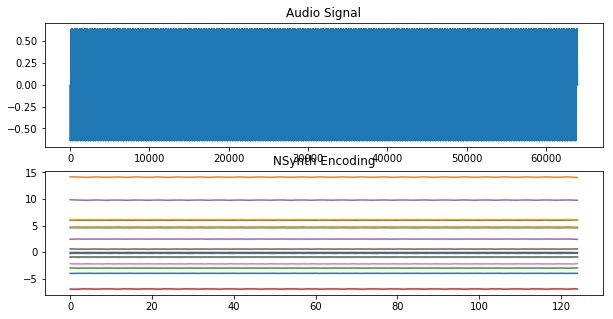

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].plot(audio);
axs[0].set_title('Audio Signal')
axs[1].plot(encoding[0]);
axs[1].set_title('NSynth Encoding')

## Decoding

Now we can decode the encodings as is.  This is the process that takes awhile.

```
help(fastgen.synthesize)
Help on function synthesize in module magenta.models.nsynth.wavenet.fastgen:

synthesize(encodings, save_paths, checkpoint_path='model.ckpt-200000', samples_per_save=1000)
    Synthesize audio from an array of embeddings.
      Args:
        encodings: Numpy array with shape [batch_size, time, dim].
        save_paths: Iterable of output file names.
        checkpoint_path: Location of the pretrained model. [model.ckpt-200000]
        samples_per_save: Save files after every amount of generated samples.
```        

In [8]:
%time fastgen.synthesize(encoding, checkpoint_path='wavenet-ckpt/model.ckpt-200000', save_paths=['gen_' + fname], samples_per_save=sample_length)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_simplecube.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 30

INFO:tensorflow:Sample: 27300
INFO:tensorflow:Sample: 27400
INFO:tensorflow:Sample: 27500
INFO:tensorflow:Sample: 27600
INFO:tensorflow:Sample: 27700
INFO:tensorflow:Sample: 27800
INFO:tensorflow:Sample: 27900
INFO:tensorflow:Sample: 28000
INFO:tensorflow:Sample: 28100
INFO:tensorflow:Sample: 28200
INFO:tensorflow:Sample: 28300
INFO:tensorflow:Sample: 28400
INFO:tensorflow:Sample: 28500
INFO:tensorflow:Sample: 28600
INFO:tensorflow:Sample: 28700
INFO:tensorflow:Sample: 28800
INFO:tensorflow:Sample: 28900
INFO:tensorflow:Sample: 29000
INFO:tensorflow:Sample: 29100
INFO:tensorflow:Sample: 29200
INFO:tensorflow:Sample: 29300
INFO:tensorflow:Sample: 29400
INFO:tensorflow:Sample: 29500
INFO:tensorflow:Sample: 29600
INFO:tensorflow:Sample: 29700
INFO:tensorflow:Sample: 29800
INFO:tensorflow:Sample: 29900
INFO:tensorflow:Sample: 30000
INFO:tensorflow:Sample: 30100
INFO:tensorflow:Sample: 30200
INFO:tensorflow:Sample: 30300
INFO:tensorflow:Sample: 30400
INFO:tensorflow:Sample: 30500
INFO:tenso

INFO:tensorflow:Sample: 54700
INFO:tensorflow:Sample: 54800
INFO:tensorflow:Sample: 54900
INFO:tensorflow:Sample: 55000
INFO:tensorflow:Sample: 55100
INFO:tensorflow:Sample: 55200
INFO:tensorflow:Sample: 55300
INFO:tensorflow:Sample: 55400
INFO:tensorflow:Sample: 55500
INFO:tensorflow:Sample: 55600
INFO:tensorflow:Sample: 55700
INFO:tensorflow:Sample: 55800
INFO:tensorflow:Sample: 55900
INFO:tensorflow:Sample: 56000
INFO:tensorflow:Sample: 56100
INFO:tensorflow:Sample: 56200
INFO:tensorflow:Sample: 56300
INFO:tensorflow:Sample: 56400
INFO:tensorflow:Sample: 56500
INFO:tensorflow:Sample: 56600
INFO:tensorflow:Sample: 56700
INFO:tensorflow:Sample: 56800
INFO:tensorflow:Sample: 56900
INFO:tensorflow:Sample: 57000
INFO:tensorflow:Sample: 57100
INFO:tensorflow:Sample: 57200
INFO:tensorflow:Sample: 57300
INFO:tensorflow:Sample: 57400
INFO:tensorflow:Sample: 57500
INFO:tensorflow:Sample: 57600
INFO:tensorflow:Sample: 57700
INFO:tensorflow:Sample: 57800
INFO:tensorflow:Sample: 57900
INFO:tenso

In [3]:
def load_encoding(fname, sample_length=None, sr=16000, ckpt='wavenet-ckpt/model.ckpt-200000'):
    audio = utils.load_audio(fname, sample_length=sample_length, sr=sr)
    encoding = fastgen.encode(audio, ckpt, sample_length)
    return audio, encoding

In [ ]:
# from https://www.freesound.org/people/maurolupo/sounds/213259/
fname = '213259__maurolupo__girl-sings-laa.wav'
sample_length = 32000
audio, encoding = load_encoding(fname, sample_length)
fastgen.synthesize(
    encoding,
    checkpoint_path='wavenet-ckpt/model.ckpt-200000',
    save_paths=['gen_' + fname],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_' + fname,
                             sample_length=sample_length,
                             sr=sr)

# Part 2: Interpolating Sounds

NSynth released plenty of great examples of what happens when you mix the embeddings of different sounds: https://magenta.tensorflow.org/nsynth-instrument - we're going to do the same but now with our own sounds!

First let's load some encodings:

In [11]:
sample_length = 480000

#A 30 second long constant tone that displays a square
aud1, enc1 = load_encoding('square.wav', sample_length)

#A 30 second long constant tone that displays a flat pyramid
aud2, enc2 = load_encoding('pyramid.wav', sample_length)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


As another example of what's possible with interpolation of embeddings, we'll try crossfading between the two embeddings.  To do this, we'll write a utility function which will use a hanning window to apply a fade in or out to the embeddings matrix:

In [4]:
def fade(encoding, mode='in'):
    length = encoding.shape[1]
    fadein = (0.5 * (1.0 - np.cos(3.1415 * np.arange(length) / 
                                  float(length)))).reshape(1, -1, 1)
    if mode == 'in':
        return fadein * encoding
    else:
        return (1.0 - fadein) * encoding

Text(0.5,1,'Fade Out')

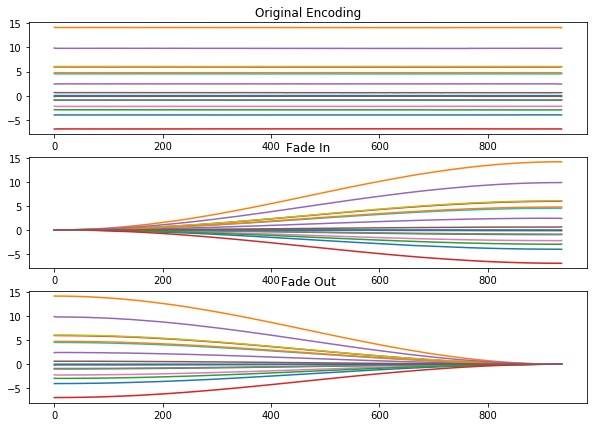

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Original Encoding')
axs[1].plot(fade(enc1, 'in')[0]);
axs[1].set_title('Fade In')
axs[2].plot(fade(enc1, 'out')[0]);
axs[2].set_title('Fade Out')

Now we can cross fade two different encodings by adding their repsective fade ins and out:

In [5]:
def crossfade(encoding1, encoding2):
    return fade(encoding1, 'out') + fade(encoding2, 'in')

Text(0.5,1,'Crossfade')

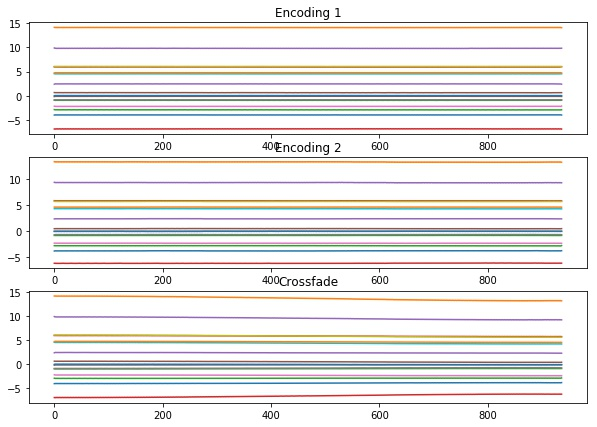

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(crossfade(enc1, enc2)[0]);
axs[2].set_title('Crossfade')

Now let's synthesize the resulting encodings:

In [16]:
fastgen.synthesize(crossfade(enc1, enc2), checkpoint_path='wavenet-ckpt/model.ckpt-200000', save_paths=['30crossfade.wav'])

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: 30crossfade.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 3000


INFO:tensorflow:Sample: 27100
INFO:tensorflow:Sample: 27200
INFO:tensorflow:Sample: 27300
INFO:tensorflow:Sample: 27400
INFO:tensorflow:Sample: 27500
INFO:tensorflow:Sample: 27600
INFO:tensorflow:Sample: 27700
INFO:tensorflow:Sample: 27800
INFO:tensorflow:Sample: 27900
INFO:tensorflow:Sample: 28000
INFO:tensorflow:Sample: 28100
INFO:tensorflow:Sample: 28200
INFO:tensorflow:Sample: 28300
INFO:tensorflow:Sample: 28400
INFO:tensorflow:Sample: 28500
INFO:tensorflow:Sample: 28600
INFO:tensorflow:Sample: 28700
INFO:tensorflow:Sample: 28800
INFO:tensorflow:Sample: 28900
INFO:tensorflow:Sample: 29000
INFO:tensorflow:Sample: 29100
INFO:tensorflow:Sample: 29200
INFO:tensorflow:Sample: 29300
INFO:tensorflow:Sample: 29400
INFO:tensorflow:Sample: 29500
INFO:tensorflow:Sample: 29600
INFO:tensorflow:Sample: 29700
INFO:tensorflow:Sample: 29800
INFO:tensorflow:Sample: 29900
INFO:tensorflow:Sample: 30000
INFO:tensorflow:Saving: 30crossfade.wav
INFO:tensorflow:Sample: 30100
INFO:tensorflow:Sample: 30200


INFO:tensorflow:Sample: 54100
INFO:tensorflow:Sample: 54200
INFO:tensorflow:Sample: 54300
INFO:tensorflow:Sample: 54400
INFO:tensorflow:Sample: 54500
INFO:tensorflow:Sample: 54600
INFO:tensorflow:Sample: 54700
INFO:tensorflow:Sample: 54800
INFO:tensorflow:Sample: 54900
INFO:tensorflow:Sample: 55000
INFO:tensorflow:Sample: 55100
INFO:tensorflow:Sample: 55200
INFO:tensorflow:Sample: 55300
INFO:tensorflow:Sample: 55400
INFO:tensorflow:Sample: 55500
INFO:tensorflow:Sample: 55600
INFO:tensorflow:Sample: 55700
INFO:tensorflow:Sample: 55800
INFO:tensorflow:Sample: 55900
INFO:tensorflow:Sample: 56000
INFO:tensorflow:Sample: 56100
INFO:tensorflow:Sample: 56200
INFO:tensorflow:Sample: 56300
INFO:tensorflow:Sample: 56400
INFO:tensorflow:Sample: 56500
INFO:tensorflow:Sample: 56600
INFO:tensorflow:Sample: 56700
INFO:tensorflow:Sample: 56800
INFO:tensorflow:Sample: 56900
INFO:tensorflow:Sample: 57000
INFO:tensorflow:Sample: 57100
INFO:tensorflow:Sample: 57200
INFO:tensorflow:Sample: 57300
INFO:tenso

INFO:tensorflow:Sample: 81100
INFO:tensorflow:Sample: 81200
INFO:tensorflow:Sample: 81300
INFO:tensorflow:Sample: 81400
INFO:tensorflow:Sample: 81500
INFO:tensorflow:Sample: 81600
INFO:tensorflow:Sample: 81700
INFO:tensorflow:Sample: 81800
INFO:tensorflow:Sample: 81900
INFO:tensorflow:Sample: 82000
INFO:tensorflow:Sample: 82100
INFO:tensorflow:Sample: 82200
INFO:tensorflow:Sample: 82300
INFO:tensorflow:Sample: 82400
INFO:tensorflow:Sample: 82500
INFO:tensorflow:Sample: 82600
INFO:tensorflow:Sample: 82700
INFO:tensorflow:Sample: 82800
INFO:tensorflow:Sample: 82900
INFO:tensorflow:Sample: 83000
INFO:tensorflow:Sample: 83100
INFO:tensorflow:Sample: 83200
INFO:tensorflow:Sample: 83300
INFO:tensorflow:Sample: 83400
INFO:tensorflow:Sample: 83500
INFO:tensorflow:Sample: 83600
INFO:tensorflow:Sample: 83700
INFO:tensorflow:Sample: 83800
INFO:tensorflow:Sample: 83900
INFO:tensorflow:Sample: 84000
INFO:tensorflow:Sample: 84100
INFO:tensorflow:Sample: 84200
INFO:tensorflow:Sample: 84300
INFO:tenso

INFO:tensorflow:Sample: 107900
INFO:tensorflow:Sample: 108000
INFO:tensorflow:Sample: 108100
INFO:tensorflow:Sample: 108200
INFO:tensorflow:Sample: 108300
INFO:tensorflow:Sample: 108400
INFO:tensorflow:Sample: 108500
INFO:tensorflow:Sample: 108600
INFO:tensorflow:Sample: 108700
INFO:tensorflow:Sample: 108800
INFO:tensorflow:Sample: 108900
INFO:tensorflow:Sample: 109000
INFO:tensorflow:Sample: 109100
INFO:tensorflow:Sample: 109200
INFO:tensorflow:Sample: 109300
INFO:tensorflow:Sample: 109400
INFO:tensorflow:Sample: 109500
INFO:tensorflow:Sample: 109600
INFO:tensorflow:Sample: 109700
INFO:tensorflow:Sample: 109800
INFO:tensorflow:Sample: 109900
INFO:tensorflow:Sample: 110000
INFO:tensorflow:Saving: 30crossfade.wav
INFO:tensorflow:Sample: 110100
INFO:tensorflow:Sample: 110200
INFO:tensorflow:Sample: 110300
INFO:tensorflow:Sample: 110400
INFO:tensorflow:Sample: 110500
INFO:tensorflow:Sample: 110600
INFO:tensorflow:Sample: 110700
INFO:tensorflow:Sample: 110800
INFO:tensorflow:Sample: 110900

INFO:tensorflow:Sample: 134000
INFO:tensorflow:Sample: 134100
INFO:tensorflow:Sample: 134200
INFO:tensorflow:Sample: 134300
INFO:tensorflow:Sample: 134400
INFO:tensorflow:Sample: 134500
INFO:tensorflow:Sample: 134600
INFO:tensorflow:Sample: 134700
INFO:tensorflow:Sample: 134800
INFO:tensorflow:Sample: 134900
INFO:tensorflow:Sample: 135000
INFO:tensorflow:Sample: 135100
INFO:tensorflow:Sample: 135200
INFO:tensorflow:Sample: 135300
INFO:tensorflow:Sample: 135400
INFO:tensorflow:Sample: 135500
INFO:tensorflow:Sample: 135600
INFO:tensorflow:Sample: 135700
INFO:tensorflow:Sample: 135800
INFO:tensorflow:Sample: 135900
INFO:tensorflow:Sample: 136000
INFO:tensorflow:Sample: 136100
INFO:tensorflow:Sample: 136200
INFO:tensorflow:Sample: 136300
INFO:tensorflow:Sample: 136400
INFO:tensorflow:Sample: 136500
INFO:tensorflow:Sample: 136600
INFO:tensorflow:Sample: 136700
INFO:tensorflow:Sample: 136800
INFO:tensorflow:Sample: 136900
INFO:tensorflow:Sample: 137000
INFO:tensorflow:Sample: 137100
INFO:ten

INFO:tensorflow:Sample: 160100
INFO:tensorflow:Sample: 160200
INFO:tensorflow:Sample: 160300
INFO:tensorflow:Sample: 160400
INFO:tensorflow:Sample: 160500
INFO:tensorflow:Sample: 160600
INFO:tensorflow:Sample: 160700
INFO:tensorflow:Sample: 160800
INFO:tensorflow:Sample: 160900
INFO:tensorflow:Sample: 161000
INFO:tensorflow:Sample: 161100
INFO:tensorflow:Sample: 161200
INFO:tensorflow:Sample: 161300
INFO:tensorflow:Sample: 161400
INFO:tensorflow:Sample: 161500
INFO:tensorflow:Sample: 161600
INFO:tensorflow:Sample: 161700
INFO:tensorflow:Sample: 161800
INFO:tensorflow:Sample: 161900
INFO:tensorflow:Sample: 162000
INFO:tensorflow:Sample: 162100
INFO:tensorflow:Sample: 162200
INFO:tensorflow:Sample: 162300
INFO:tensorflow:Sample: 162400
INFO:tensorflow:Sample: 162500
INFO:tensorflow:Sample: 162600
INFO:tensorflow:Sample: 162700
INFO:tensorflow:Sample: 162800
INFO:tensorflow:Sample: 162900
INFO:tensorflow:Sample: 163000
INFO:tensorflow:Sample: 163100
INFO:tensorflow:Sample: 163200
INFO:ten

INFO:tensorflow:Sample: 186300
INFO:tensorflow:Sample: 186400
INFO:tensorflow:Sample: 186500
INFO:tensorflow:Sample: 186600
INFO:tensorflow:Sample: 186700
INFO:tensorflow:Sample: 186800
INFO:tensorflow:Sample: 186900
INFO:tensorflow:Sample: 187000
INFO:tensorflow:Sample: 187100
INFO:tensorflow:Sample: 187200
INFO:tensorflow:Sample: 187300
INFO:tensorflow:Sample: 187400
INFO:tensorflow:Sample: 187500
INFO:tensorflow:Sample: 187600
INFO:tensorflow:Sample: 187700
INFO:tensorflow:Sample: 187800
INFO:tensorflow:Sample: 187900
INFO:tensorflow:Sample: 188000
INFO:tensorflow:Sample: 188100
INFO:tensorflow:Sample: 188200
INFO:tensorflow:Sample: 188300
INFO:tensorflow:Sample: 188400
INFO:tensorflow:Sample: 188500
INFO:tensorflow:Sample: 188600
INFO:tensorflow:Sample: 188700
INFO:tensorflow:Sample: 188800
INFO:tensorflow:Sample: 188900
INFO:tensorflow:Sample: 189000
INFO:tensorflow:Sample: 189100
INFO:tensorflow:Sample: 189200
INFO:tensorflow:Sample: 189300
INFO:tensorflow:Sample: 189400
INFO:ten

INFO:tensorflow:Sample: 212400
INFO:tensorflow:Sample: 212500
INFO:tensorflow:Sample: 212600
INFO:tensorflow:Sample: 212700
INFO:tensorflow:Sample: 212800
INFO:tensorflow:Sample: 212900
INFO:tensorflow:Sample: 213000
INFO:tensorflow:Sample: 213100
INFO:tensorflow:Sample: 213200
INFO:tensorflow:Sample: 213300
INFO:tensorflow:Sample: 213400
INFO:tensorflow:Sample: 213500
INFO:tensorflow:Sample: 213600
INFO:tensorflow:Sample: 213700
INFO:tensorflow:Sample: 213800
INFO:tensorflow:Sample: 213900
INFO:tensorflow:Sample: 214000
INFO:tensorflow:Sample: 214100
INFO:tensorflow:Sample: 214200
INFO:tensorflow:Sample: 214300
INFO:tensorflow:Sample: 214400
INFO:tensorflow:Sample: 214500
INFO:tensorflow:Sample: 214600
INFO:tensorflow:Sample: 214700
INFO:tensorflow:Sample: 214800
INFO:tensorflow:Sample: 214900
INFO:tensorflow:Sample: 215000
INFO:tensorflow:Sample: 215100
INFO:tensorflow:Sample: 215200
INFO:tensorflow:Sample: 215300
INFO:tensorflow:Sample: 215400
INFO:tensorflow:Sample: 215500
INFO:ten

INFO:tensorflow:Sample: 238600
INFO:tensorflow:Sample: 238700
INFO:tensorflow:Sample: 238800
INFO:tensorflow:Sample: 238900
INFO:tensorflow:Sample: 239000
INFO:tensorflow:Sample: 239100
INFO:tensorflow:Sample: 239200
INFO:tensorflow:Sample: 239300
INFO:tensorflow:Sample: 239400
INFO:tensorflow:Sample: 239500
INFO:tensorflow:Sample: 239600
INFO:tensorflow:Sample: 239700
INFO:tensorflow:Sample: 239800
INFO:tensorflow:Sample: 239900
INFO:tensorflow:Sample: 240000
INFO:tensorflow:Saving: 30crossfade.wav
INFO:tensorflow:Sample: 240100
INFO:tensorflow:Sample: 240200
INFO:tensorflow:Sample: 240300
INFO:tensorflow:Sample: 240400
INFO:tensorflow:Sample: 240500
INFO:tensorflow:Sample: 240600
INFO:tensorflow:Sample: 240700
INFO:tensorflow:Sample: 240800
INFO:tensorflow:Sample: 240900
INFO:tensorflow:Sample: 241000
INFO:tensorflow:Sample: 241100
INFO:tensorflow:Sample: 241200
INFO:tensorflow:Sample: 241300
INFO:tensorflow:Sample: 241400
INFO:tensorflow:Sample: 241500
INFO:tensorflow:Sample: 241600

INFO:tensorflow:Sample: 264700
INFO:tensorflow:Sample: 264800
INFO:tensorflow:Sample: 264900
INFO:tensorflow:Sample: 265000
INFO:tensorflow:Sample: 265100
INFO:tensorflow:Sample: 265200
INFO:tensorflow:Sample: 265300
INFO:tensorflow:Sample: 265400
INFO:tensorflow:Sample: 265500
INFO:tensorflow:Sample: 265600
INFO:tensorflow:Sample: 265700
INFO:tensorflow:Sample: 265800
INFO:tensorflow:Sample: 265900
INFO:tensorflow:Sample: 266000
INFO:tensorflow:Sample: 266100
INFO:tensorflow:Sample: 266200
INFO:tensorflow:Sample: 266300
INFO:tensorflow:Sample: 266400
INFO:tensorflow:Sample: 266500
INFO:tensorflow:Sample: 266600
INFO:tensorflow:Sample: 266700
INFO:tensorflow:Sample: 266800
INFO:tensorflow:Sample: 266900
INFO:tensorflow:Sample: 267000
INFO:tensorflow:Sample: 267100
INFO:tensorflow:Sample: 267200
INFO:tensorflow:Sample: 267300
INFO:tensorflow:Sample: 267400
INFO:tensorflow:Sample: 267500
INFO:tensorflow:Sample: 267600
INFO:tensorflow:Sample: 267700
INFO:tensorflow:Sample: 267800
INFO:ten

INFO:tensorflow:Sample: 290800
INFO:tensorflow:Sample: 290900
INFO:tensorflow:Sample: 291000
INFO:tensorflow:Sample: 291100
INFO:tensorflow:Sample: 291200
INFO:tensorflow:Sample: 291300
INFO:tensorflow:Sample: 291400
INFO:tensorflow:Sample: 291500
INFO:tensorflow:Sample: 291600
INFO:tensorflow:Sample: 291700
INFO:tensorflow:Sample: 291800
INFO:tensorflow:Sample: 291900
INFO:tensorflow:Sample: 292000
INFO:tensorflow:Sample: 292100
INFO:tensorflow:Sample: 292200
INFO:tensorflow:Sample: 292300
INFO:tensorflow:Sample: 292400
INFO:tensorflow:Sample: 292500
INFO:tensorflow:Sample: 292600
INFO:tensorflow:Sample: 292700
INFO:tensorflow:Sample: 292800
INFO:tensorflow:Sample: 292900
INFO:tensorflow:Sample: 293000
INFO:tensorflow:Sample: 293100
INFO:tensorflow:Sample: 293200
INFO:tensorflow:Sample: 293300
INFO:tensorflow:Sample: 293400
INFO:tensorflow:Sample: 293500
INFO:tensorflow:Sample: 293600
INFO:tensorflow:Sample: 293700
INFO:tensorflow:Sample: 293800
INFO:tensorflow:Sample: 293900
INFO:ten

INFO:tensorflow:Sample: 317000
INFO:tensorflow:Sample: 317100
INFO:tensorflow:Sample: 317200
INFO:tensorflow:Sample: 317300
INFO:tensorflow:Sample: 317400
INFO:tensorflow:Sample: 317500
INFO:tensorflow:Sample: 317600
INFO:tensorflow:Sample: 317700
INFO:tensorflow:Sample: 317800
INFO:tensorflow:Sample: 317900
INFO:tensorflow:Sample: 318000
INFO:tensorflow:Sample: 318100
INFO:tensorflow:Sample: 318200
INFO:tensorflow:Sample: 318300
INFO:tensorflow:Sample: 318400
INFO:tensorflow:Sample: 318500
INFO:tensorflow:Sample: 318600
INFO:tensorflow:Sample: 318700
INFO:tensorflow:Sample: 318800
INFO:tensorflow:Sample: 318900
INFO:tensorflow:Sample: 319000
INFO:tensorflow:Sample: 319100
INFO:tensorflow:Sample: 319200
INFO:tensorflow:Sample: 319300
INFO:tensorflow:Sample: 319400
INFO:tensorflow:Sample: 319500
INFO:tensorflow:Sample: 319600
INFO:tensorflow:Sample: 319700
INFO:tensorflow:Sample: 319800
INFO:tensorflow:Sample: 319900
INFO:tensorflow:Sample: 320000
INFO:tensorflow:Saving: 30crossfade.wav

INFO:tensorflow:Sample: 343100
INFO:tensorflow:Sample: 343200
INFO:tensorflow:Sample: 343300
INFO:tensorflow:Sample: 343400
INFO:tensorflow:Sample: 343500
INFO:tensorflow:Sample: 343600
INFO:tensorflow:Sample: 343700
INFO:tensorflow:Sample: 343800
INFO:tensorflow:Sample: 343900
INFO:tensorflow:Sample: 344000
INFO:tensorflow:Sample: 344100
INFO:tensorflow:Sample: 344200
INFO:tensorflow:Sample: 344300
INFO:tensorflow:Sample: 344400
INFO:tensorflow:Sample: 344500
INFO:tensorflow:Sample: 344600
INFO:tensorflow:Sample: 344700
INFO:tensorflow:Sample: 344800
INFO:tensorflow:Sample: 344900
INFO:tensorflow:Sample: 345000
INFO:tensorflow:Sample: 345100
INFO:tensorflow:Sample: 345200
INFO:tensorflow:Sample: 345300
INFO:tensorflow:Sample: 345400
INFO:tensorflow:Sample: 345500
INFO:tensorflow:Sample: 345600
INFO:tensorflow:Sample: 345700
INFO:tensorflow:Sample: 345800
INFO:tensorflow:Sample: 345900
INFO:tensorflow:Sample: 346000
INFO:tensorflow:Sample: 346100
INFO:tensorflow:Sample: 346200
INFO:ten

INFO:tensorflow:Sample: 369300
INFO:tensorflow:Sample: 369400
INFO:tensorflow:Sample: 369500
INFO:tensorflow:Sample: 369600
INFO:tensorflow:Sample: 369700
INFO:tensorflow:Sample: 369800
INFO:tensorflow:Sample: 369900
INFO:tensorflow:Sample: 370000
INFO:tensorflow:Saving: 30crossfade.wav
INFO:tensorflow:Sample: 370100
INFO:tensorflow:Sample: 370200
INFO:tensorflow:Sample: 370300
INFO:tensorflow:Sample: 370400
INFO:tensorflow:Sample: 370500
INFO:tensorflow:Sample: 370600
INFO:tensorflow:Sample: 370700
INFO:tensorflow:Sample: 370800
INFO:tensorflow:Sample: 370900
INFO:tensorflow:Sample: 371000
INFO:tensorflow:Sample: 371100
INFO:tensorflow:Sample: 371200
INFO:tensorflow:Sample: 371300
INFO:tensorflow:Sample: 371400
INFO:tensorflow:Sample: 371500
INFO:tensorflow:Sample: 371600
INFO:tensorflow:Sample: 371700
INFO:tensorflow:Sample: 371800
INFO:tensorflow:Sample: 371900
INFO:tensorflow:Sample: 372000
INFO:tensorflow:Sample: 372100
INFO:tensorflow:Sample: 372200
INFO:tensorflow:Sample: 372300

INFO:tensorflow:Sample: 395400
INFO:tensorflow:Sample: 395500
INFO:tensorflow:Sample: 395600
INFO:tensorflow:Sample: 395700
INFO:tensorflow:Sample: 395800
INFO:tensorflow:Sample: 395900
INFO:tensorflow:Sample: 396000
INFO:tensorflow:Sample: 396100
INFO:tensorflow:Sample: 396200
INFO:tensorflow:Sample: 396300
INFO:tensorflow:Sample: 396400
INFO:tensorflow:Sample: 396500
INFO:tensorflow:Sample: 396600
INFO:tensorflow:Sample: 396700
INFO:tensorflow:Sample: 396800
INFO:tensorflow:Sample: 396900
INFO:tensorflow:Sample: 397000
INFO:tensorflow:Sample: 397100
INFO:tensorflow:Sample: 397200
INFO:tensorflow:Sample: 397300
INFO:tensorflow:Sample: 397400
INFO:tensorflow:Sample: 397500
INFO:tensorflow:Sample: 397600
INFO:tensorflow:Sample: 397700
INFO:tensorflow:Sample: 397800
INFO:tensorflow:Sample: 397900
INFO:tensorflow:Sample: 398000
INFO:tensorflow:Sample: 398100
INFO:tensorflow:Sample: 398200
INFO:tensorflow:Sample: 398300
INFO:tensorflow:Sample: 398400
INFO:tensorflow:Sample: 398500
INFO:ten

INFO:tensorflow:Sample: 421500
INFO:tensorflow:Sample: 421600
INFO:tensorflow:Sample: 421700
INFO:tensorflow:Sample: 421800
INFO:tensorflow:Sample: 421900
INFO:tensorflow:Sample: 422000
INFO:tensorflow:Sample: 422100
INFO:tensorflow:Sample: 422200
INFO:tensorflow:Sample: 422300
INFO:tensorflow:Sample: 422400
INFO:tensorflow:Sample: 422500
INFO:tensorflow:Sample: 422600
INFO:tensorflow:Sample: 422700
INFO:tensorflow:Sample: 422800
INFO:tensorflow:Sample: 422900
INFO:tensorflow:Sample: 423000
INFO:tensorflow:Sample: 423100
INFO:tensorflow:Sample: 423200
INFO:tensorflow:Sample: 423300
INFO:tensorflow:Sample: 423400
INFO:tensorflow:Sample: 423500
INFO:tensorflow:Sample: 423600
INFO:tensorflow:Sample: 423700
INFO:tensorflow:Sample: 423800
INFO:tensorflow:Sample: 423900
INFO:tensorflow:Sample: 424000
INFO:tensorflow:Sample: 424100
INFO:tensorflow:Sample: 424200
INFO:tensorflow:Sample: 424300
INFO:tensorflow:Sample: 424400
INFO:tensorflow:Sample: 424500
INFO:tensorflow:Sample: 424600
INFO:ten

INFO:tensorflow:Sample: 447700
INFO:tensorflow:Sample: 447800
INFO:tensorflow:Sample: 447900
INFO:tensorflow:Sample: 448000
INFO:tensorflow:Sample: 448100
INFO:tensorflow:Sample: 448200
INFO:tensorflow:Sample: 448300
INFO:tensorflow:Sample: 448400
INFO:tensorflow:Sample: 448500
INFO:tensorflow:Sample: 448600
INFO:tensorflow:Sample: 448700
INFO:tensorflow:Sample: 448800
INFO:tensorflow:Sample: 448900
INFO:tensorflow:Sample: 449000
INFO:tensorflow:Sample: 449100
INFO:tensorflow:Sample: 449200
INFO:tensorflow:Sample: 449300
INFO:tensorflow:Sample: 449400
INFO:tensorflow:Sample: 449500
INFO:tensorflow:Sample: 449600
INFO:tensorflow:Sample: 449700
INFO:tensorflow:Sample: 449800
INFO:tensorflow:Sample: 449900
INFO:tensorflow:Sample: 450000
INFO:tensorflow:Saving: 30crossfade.wav
INFO:tensorflow:Sample: 450100
INFO:tensorflow:Sample: 450200
INFO:tensorflow:Sample: 450300
INFO:tensorflow:Sample: 450400
INFO:tensorflow:Sample: 450500
INFO:tensorflow:Sample: 450600
INFO:tensorflow:Sample: 450700

INFO:tensorflow:Sample: 473800
INFO:tensorflow:Sample: 473900
INFO:tensorflow:Sample: 474000
INFO:tensorflow:Sample: 474100
INFO:tensorflow:Sample: 474200
INFO:tensorflow:Sample: 474300
INFO:tensorflow:Sample: 474400
INFO:tensorflow:Sample: 474500
INFO:tensorflow:Sample: 474600
INFO:tensorflow:Sample: 474700
INFO:tensorflow:Sample: 474800
INFO:tensorflow:Sample: 474900
INFO:tensorflow:Sample: 475000
INFO:tensorflow:Sample: 475100
INFO:tensorflow:Sample: 475200
INFO:tensorflow:Sample: 475300
INFO:tensorflow:Sample: 475400
INFO:tensorflow:Sample: 475500
INFO:tensorflow:Sample: 475600
INFO:tensorflow:Sample: 475700
INFO:tensorflow:Sample: 475800
INFO:tensorflow:Sample: 475900
INFO:tensorflow:Sample: 476000
INFO:tensorflow:Sample: 476100
INFO:tensorflow:Sample: 476200
INFO:tensorflow:Sample: 476300
INFO:tensorflow:Sample: 476400
INFO:tensorflow:Sample: 476500
INFO:tensorflow:Sample: 476600
INFO:tensorflow:Sample: 476700
INFO:tensorflow:Sample: 476800
INFO:tensorflow:Sample: 476900
INFO:ten

In [6]:
#Making another interpolation sequence
sample_length = 480000

#A 30 second long constant tone that displays a pyramid
aud1, enc1 = load_encoding('pyramid.wav', sample_length)

#A 30 second long constant tone that displays a space shuttle
aud2, enc2 = load_encoding('shuttle.wav', sample_length)

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000


In [ ]:
fastgen.synthesize(crossfade(enc1, enc2), checkpoint_path='wavenet-ckpt/model.ckpt-200000', save_paths=['crossfade_pyramid_to_shuttle.wav'])

INFO:tensorflow:Restoring parameters from wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: crossfade_pyramid_to_shuttle.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorf

INFO:tensorflow:Sample: 26900
INFO:tensorflow:Sample: 27000
INFO:tensorflow:Sample: 27100
INFO:tensorflow:Sample: 27200
INFO:tensorflow:Sample: 27300
INFO:tensorflow:Sample: 27400
INFO:tensorflow:Sample: 27500
INFO:tensorflow:Sample: 27600
INFO:tensorflow:Sample: 27700
INFO:tensorflow:Sample: 27800
INFO:tensorflow:Sample: 27900
INFO:tensorflow:Sample: 28000
INFO:tensorflow:Sample: 28100
INFO:tensorflow:Sample: 28200
INFO:tensorflow:Sample: 28300
INFO:tensorflow:Sample: 28400
INFO:tensorflow:Sample: 28500
INFO:tensorflow:Sample: 28600
INFO:tensorflow:Sample: 28700
INFO:tensorflow:Sample: 28800
INFO:tensorflow:Sample: 28900
INFO:tensorflow:Sample: 29000
INFO:tensorflow:Sample: 29100
INFO:tensorflow:Sample: 29200
INFO:tensorflow:Sample: 29300
INFO:tensorflow:Sample: 29400
INFO:tensorflow:Sample: 29500
INFO:tensorflow:Sample: 29600
INFO:tensorflow:Sample: 29700
INFO:tensorflow:Sample: 29800
INFO:tensorflow:Sample: 29900
INFO:tensorflow:Sample: 30000
INFO:tensorflow:Saving: crossfade_pyrami

INFO:tensorflow:Sample: 53700
INFO:tensorflow:Sample: 53800
INFO:tensorflow:Sample: 53900
INFO:tensorflow:Sample: 54000
INFO:tensorflow:Sample: 54100
INFO:tensorflow:Sample: 54200
INFO:tensorflow:Sample: 54300
INFO:tensorflow:Sample: 54400
INFO:tensorflow:Sample: 54500
INFO:tensorflow:Sample: 54600
INFO:tensorflow:Sample: 54700
INFO:tensorflow:Sample: 54800
INFO:tensorflow:Sample: 54900
INFO:tensorflow:Sample: 55000
INFO:tensorflow:Sample: 55100
INFO:tensorflow:Sample: 55200
INFO:tensorflow:Sample: 55300
INFO:tensorflow:Sample: 55400
INFO:tensorflow:Sample: 55500
INFO:tensorflow:Sample: 55600
INFO:tensorflow:Sample: 55700
INFO:tensorflow:Sample: 55800
INFO:tensorflow:Sample: 55900
INFO:tensorflow:Sample: 56000
INFO:tensorflow:Sample: 56100
INFO:tensorflow:Sample: 56200
INFO:tensorflow:Sample: 56300
INFO:tensorflow:Sample: 56400
INFO:tensorflow:Sample: 56500
INFO:tensorflow:Sample: 56600
INFO:tensorflow:Sample: 56700
INFO:tensorflow:Sample: 56800
INFO:tensorflow:Sample: 56900
INFO:tenso

INFO:tensorflow:Sample: 80500
INFO:tensorflow:Sample: 80600
INFO:tensorflow:Sample: 80700
INFO:tensorflow:Sample: 80800
INFO:tensorflow:Sample: 80900
INFO:tensorflow:Sample: 81000
INFO:tensorflow:Sample: 81100
INFO:tensorflow:Sample: 81200
INFO:tensorflow:Sample: 81300
INFO:tensorflow:Sample: 81400
INFO:tensorflow:Sample: 81500
INFO:tensorflow:Sample: 81600
INFO:tensorflow:Sample: 81700
INFO:tensorflow:Sample: 81800
INFO:tensorflow:Sample: 81900
INFO:tensorflow:Sample: 82000
INFO:tensorflow:Sample: 82100
INFO:tensorflow:Sample: 82200
INFO:tensorflow:Sample: 82300
INFO:tensorflow:Sample: 82400
INFO:tensorflow:Sample: 82500
INFO:tensorflow:Sample: 82600
INFO:tensorflow:Sample: 82700
INFO:tensorflow:Sample: 82800
INFO:tensorflow:Sample: 82900
INFO:tensorflow:Sample: 83000
INFO:tensorflow:Sample: 83100
INFO:tensorflow:Sample: 83200
INFO:tensorflow:Sample: 83300
INFO:tensorflow:Sample: 83400
INFO:tensorflow:Sample: 83500
INFO:tensorflow:Sample: 83600
INFO:tensorflow:Sample: 83700
INFO:tenso

INFO:tensorflow:Sample: 107200
INFO:tensorflow:Sample: 107300
INFO:tensorflow:Sample: 107400
INFO:tensorflow:Sample: 107500
INFO:tensorflow:Sample: 107600
INFO:tensorflow:Sample: 107700
INFO:tensorflow:Sample: 107800
INFO:tensorflow:Sample: 107900
INFO:tensorflow:Sample: 108000
INFO:tensorflow:Sample: 108100
INFO:tensorflow:Sample: 108200
INFO:tensorflow:Sample: 108300
INFO:tensorflow:Sample: 108400
INFO:tensorflow:Sample: 108500
INFO:tensorflow:Sample: 108600
INFO:tensorflow:Sample: 108700
INFO:tensorflow:Sample: 108800
INFO:tensorflow:Sample: 108900
INFO:tensorflow:Sample: 109000
INFO:tensorflow:Sample: 109100
INFO:tensorflow:Sample: 109200
INFO:tensorflow:Sample: 109300
INFO:tensorflow:Sample: 109400
INFO:tensorflow:Sample: 109500
INFO:tensorflow:Sample: 109600
INFO:tensorflow:Sample: 109700
INFO:tensorflow:Sample: 109800
INFO:tensorflow:Sample: 109900
INFO:tensorflow:Sample: 110000
INFO:tensorflow:Saving: crossfade_pyramid_to_shuttle.wav
INFO:tensorflow:Sample: 110100
INFO:tensorfl

INFO:tensorflow:Sample: 133100
INFO:tensorflow:Sample: 133200
INFO:tensorflow:Sample: 133300
INFO:tensorflow:Sample: 133400
INFO:tensorflow:Sample: 133500
INFO:tensorflow:Sample: 133600
INFO:tensorflow:Sample: 133700
INFO:tensorflow:Sample: 133800
INFO:tensorflow:Sample: 133900
INFO:tensorflow:Sample: 134000
INFO:tensorflow:Sample: 134100
INFO:tensorflow:Sample: 134200
INFO:tensorflow:Sample: 134300
INFO:tensorflow:Sample: 134400
INFO:tensorflow:Sample: 134500
INFO:tensorflow:Sample: 134600
INFO:tensorflow:Sample: 134700
INFO:tensorflow:Sample: 134800
INFO:tensorflow:Sample: 134900
INFO:tensorflow:Sample: 135000
INFO:tensorflow:Sample: 135100
INFO:tensorflow:Sample: 135200
INFO:tensorflow:Sample: 135300
INFO:tensorflow:Sample: 135400
INFO:tensorflow:Sample: 135500
INFO:tensorflow:Sample: 135600
INFO:tensorflow:Sample: 135700
INFO:tensorflow:Sample: 135800
INFO:tensorflow:Sample: 135900
INFO:tensorflow:Sample: 136000
INFO:tensorflow:Sample: 136100
INFO:tensorflow:Sample: 136200
INFO:ten

INFO:tensorflow:Sample: 159200
INFO:tensorflow:Sample: 159300
INFO:tensorflow:Sample: 159400
